Tarea Redes Neuronales
Integrantes
- Gómez Fernando
- Ruano Bairon
- Ruiz Hugo

# Instalar 
conda create -n APIDeepStreamlit anaconda python=3.7.7
conda activate APIDeepStreamlit
conda install ipykernel
python -m ipykernel install --user --name APIDeepStreamlit --display-name "APIDeepStreamlit"
conda install tensorflow-gpu==2.1.0 cudatoolkit=10.1
pip install tensorflow==2.1.0
pip install jupyter
pip install keras==2.3.1
pip install numpy scipy Pillow cython matplotlib scikit-image opencv-python h5py imgaug IPython[all] streamlit

In [218]:
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import os
import pickle 
from zipfile import ZipFile
import streamlit as st
from PIL import Image
from skimage.transform import resize

In [219]:
# Cargar archivo comprimido con todas las imágenes 
zip = ZipFile('64x64_SIGNS.zip')
zip.extractall()

In [220]:
#Función para cargar las imágenes
def imgload(path=','):
  temp = os.listdir(path)
  img2 = []
  img2.append(temp)
  return img2

In [221]:
ruta = os.getcwd()
rutaTrain = os.path.join(ruta,'64x64_SIGNS/train_signs/')

file_name = imgload(rutaTrain)
x = file_name[0]
x = np.array(x)

In [222]:
#Cargar imágenes de entrenamiento con sus respectivas etiquetas
train_data = []
y_train = []
for i in range(x.shape[0]):
    train_data.append(plt.imread(os.path.join(rutaTrain,x[i])))
    y_train.append((str(x[i])[0]))

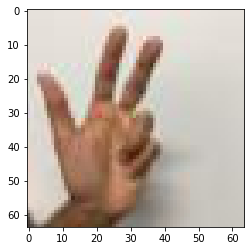

In [302]:
#Mostrar una imagen cargada
plt.imshow(train_data[500])

In [287]:
#Creación del modelo y sus capas 
model1 = models.Sequential()
model1.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', input_shape=(64, 64,3)))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(64,(2,2),activation='relu'))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(64,(2,2),activation='relu'))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(64,(2,2),activation='relu'))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(64,(2,2),activation='relu'))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dense(10))
model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dense(10))
model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dense(10))

In [288]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [289]:
train_data=np.array(train_data)
for i in range(864):
  for a in range(64):
    for b in range(64):
      for c in range(3):
        train_data[i,a,b,c]=float(train_data[i,a,b,c]) 
train_data=train_data.tolist()
for i in range(864):
  y_train[i]=float(y_train[i])

In [290]:
#Entrenamiento del modelo
history=model1.fit(train_data,y_train,epochs=100)

Epoch 1/100
27/27 [==============================] - 6s 201ms/step - loss: 3.1490 - accuracy: 0.1509
Epoch 2/100
27/27 [==============================] - 6s 209ms/step - loss: 1.8135 - accuracy: 0.2028
Epoch 3/100
27/27 [==============================] - 6s 214ms/step - loss: 1.7392 - accuracy: 0.2478
Epoch 4/100
27/27 [==============================] - 5s 198ms/step - loss: 1.6425 - accuracy: 0.3078
Epoch 5/100
27/27 [==============================] - 6s 205ms/step - loss: 1.4823 - accuracy: 0.3690
Epoch 6/100
27/27 [==============================] - 5s 197ms/step - loss: 1.4465 - accuracy: 0.3798
Epoch 7/100
27/27 [==============================] - 5s 198ms/step - loss: 1.2351 - accuracy: 0.4609
Epoch 8/100
27/27 [==============================] - 5s 202ms/step - loss: 1.0894 - accuracy: 0.5073
Epoch 9/100
27/27 [==============================] - 6s 206ms/step - loss: 0.9434 - accuracy: 0.5785
Epoch 10/100
27/27 [==============================] - 6s 204ms/step - loss: 0.7560 - accura

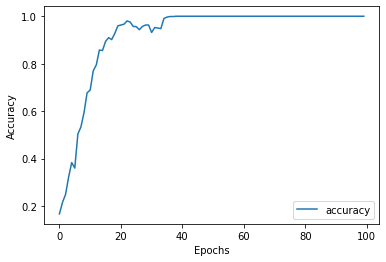

In [291]:
# Gráfica de la historia del modelo
plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [292]:
#Cargar datos para el segundo modelo
file_name = imgload(rutaTrain)
x1 = file_name[0]
x1 = np.array(x1)

train_data2 = []
y_train2 = []
for i in range(x1.shape[0]):
  train_data2.append(plt.imread(os.path.join(rutaTrain,x[i])))
  y_train2.append((str(x1[i])[0]))

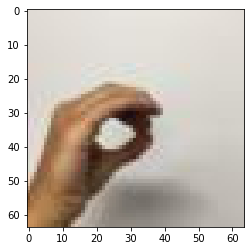

In [293]:
# Mostrar una imagen cargada
plt.imshow(train_data[7])

In [294]:
train_data=np.array(train_data)
for i in range(120):
  for a in range(64):
    for b in range(64):
      for c in range(3):
        train_data[i,a,b,c]=float(train_data[i,a,b,c]) 
train_data=train_data.tolist()
for i in range(120):
  y_train[i]=float(y_train[i])

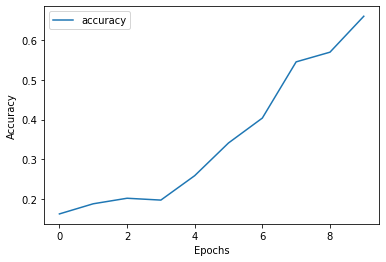

In [295]:
plt.plot(history2.history['accuracy'],label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [296]:
# Validación y comparación de los resultados de los dos modelos
#y_pred1 = model1.predict(train_data)
#y_pred2 = model2.predict(train_data) 


In [297]:
tf.saved_model.save(model1, os.path.join(ruta,'Modelo'))


INFO:tensorflow:Assets written to: C:\Users\Acer\Desktop\Universidad\8vo\Automatización\Tarea redes\Modelo\assets


2021-02-08 04:13:01.775 INFO    tensorflow: Assets written to: C:\Users\Acer\Desktop\Universidad\8vo\Automatización\Tarea redes\Modelo\assets


In [298]:
y_pred1[400]

array([  0.10335889,   6.4355817 ,  23.556286  ,   2.1527238 ,
        11.334926  ,  -1.207221  , -23.41453   , -30.698523  ,
       -17.139475  , -29.346754  ], dtype=float32)

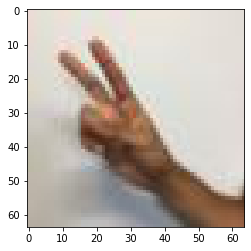

In [299]:
plt.imshow(train_data[400])